<a href="https://colab.research.google.com/github/ga0808/sql/blob/main/New8%EC%84%9C%EB%B8%8C%EC%BF%BC%EB%A6%AC_%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#실습 1

# -- 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

# -- 자신의 관리자의 급여보다 높거나 같은 급여를 가진 직원의 ID를 출력하는 쿼리를 작성해봅시다.

#아까 풀었던 셀프 조인에 대한 내용인데, 이번엔 다르게 연관 서브쿼리문으로 작성

#EMPLOYEE에서 자신의 관리자의 급여 (관리자도 사내 직원 중의 한명) ==> 서브쿼리
#-> EMPLOYEE에서에 있는 각 직원의 관리자 id에 대해서 - EMPLOYEE에서 직원 id로 조회 ==> 메인 쿼리와 연관 서브쿼리


SELECT employee_id
from EMPLOYEE a
WHERE salary >= #직원의 조회해온 관리자의 연봉보다 큰 경우에 대한 조건
 (SELECT salary
  FROM EMPLOYEE b
  # 각 직원의 관리자의 정보를 얻기위해 - 관리자 아이디를 가지고 - 직원 번호와 비교하여 가져옴
  #관리자 아이디와 동일한 직원 아이디를 가지는 행 -> 관리자의 정보 행
  WHERE a.manager_id =  b.employee_id )
ORDER BY employee_id asc;


In [ ]:
#실습 2

# -- 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

#직원 아이디 - 연봉 - 관리자 아이디
# -- 급여가 8000미만인 직원의 관리자 아이디와 급여를 출력하는 쿼리를 작성하세요.
# 급여가 8000 미만인 직원들이 있을 것, 그 사람들의 관리자 아이디와 급여를 조회

# 각 직원의 관리자 아이디는 알겠는데, 관리자의 연봉이나 관리자 정보는?
# 관리자도 사내 직원들 중의 한명이니까
# 각 직원의 관리자 아이디를 -> 다시 한번 동일한 데이터 테이블에서 직원 아이디로 조회하면 되겠음

# 급여가 8000미만인 직원들의 관리자 아이디 조회 -> 서브쿼리
# 조회한 관리자 아이디들 중에 하나라도 만족하는 직원 아이디라면 ? 해당 직원의 아이디와 연봉 조회
#   -> 메인쿼리 - 하나라도 만족하는 조건 -> 하나라도 만족 = IN / ANY
#

SELECT employee_id, salary
from EMPLOYEE
where employee_id in      = any() #가독성은 in이 좋음
    (
    SELECT manager_id
    FROM EMPLOYEE
    where salary < 8000
    )
order by employee_id asc;
              # #연관 쿼리 ==== 수업 x
              # SELECT employee_id, salary
              # FROM EMPLOYEE e1
              # WHERE EXISTS (
              #     SELECT 1
              #     FROM EMPLOYEE e2
              #     WHERE e2.manager_id = e1.employee_id
              #     AND e2.salary < 8000
              # )
              # ORDER BY employee_id ASC;


In [ ]:
#퀴즈 1 - 비연관 서브쿼리 (서브쿼리에서 메인 쿼리의 데이터를 참조하지 않고 독립적으로 실행)

In [ ]:
#실습 3

# -- 아래는 REQUEST, REQUEST_DTL 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC REQUEST; # 요청 id, 요청 상태 정보
DESC REQUEST_DTL; # 요청 상세 ID, 요청 ID, 요청 이름, 요청 내용 등

# -- 1. REQUEST에서 요청상태가 FAILED인 요청 데이터의 request_id를 조회
SELECT request_id
FROM REQUEST
WHERE request_status = 'FAILED'
;
#단일 결과가 조회됨

#FAILED라고 조회된 request_id에 대한 데이터를 REQUEST_DTL테이블에서 조회

# -- 2. 위에서 작성한 쿼리를 서브쿼리로 이용하여 REQUEST_DTL 테이블에서 요청 상세를 조회하는 쿼리를 작성해보세요.
# REQUEST_DTL테이블에서
# 1번 쿼리를 -> 서브 쿼리로 사용하고
# 특정 컬럼들만 조회하기
SELECT request_dtl_id, request_id, request_name, request_content
from REQUEST_DTL
where request_id = ( #서브쿼리의 결과가 단일행이기 때문에 = 라는 단일행 연산자 사용
    SELECT request_id
    FROM REQUEST
    where request_status = 'FAILED'
);


In [ ]:
#퀴즈2 - 스티브

In [ ]:
#실습 4
#아래는 REQUEST, REQUEST_DTL 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC REQUEST;
DESC REQUEST_DTL;


#이전 문제 처럼 요청 상태가 FAILED인 요청 ID를 구하기
SELECT request_id FROM REQUEST where request_status = 'FAILED'
#이번에는 단일 행이 아니라 여러 행의 반환됨 확인하기

# 요청 상태가 FAILED인 요청 ID를 구하고, 해당 요청들에 대한 요청 상세 정보를 조회하는 쿼리를 작성해보세요.
SELECT request_dtl_id, request_id, request_name, request_content
from REQUEST_DTL
where request_id IN #다중행 연산자 사용
 (SELECT request_id
  FROM REQUEST
  where request_status = 'FAILED')
order by request_dtl_id asc;


In [ ]:
#실습 5

# 아래는 STORE, PAYMENT 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC STORE; #가게 ID와 가게 이름 - 가게 정보들
DESC PAYMENT; #결제 ID와 가게 ID, 결제금액 - 결제 정보들


# EXISTS문을 응용하여, 결제금액이 5000원 이상인 가게ID, 가게이름을 조회하는 쿼리를 작성해보세요.
select store_id, store_name
from STORE s
where EXISTS
 (SELECT 'x'
  #조회하고자 하는 데이터가 없이, 그냥 존재여부만을 진행하고자 함 보통은 1
  FROM PAYMENT p
  WHERE s.store_id = p.store_id
  #가게 이름 -> STORE 테이블에 존재,
  #근데 결제 금액에 대한 조건도 확인해야함
  #그래서 a가게 이름을 가진 (가게 아이디1) 가게의 결제금액이 5000원 이상인지 따지기 위해서
  #가게 id를 동일시해서 같은 가게 들의 정보일 수 있게 (가게이름, 결제 아이디/금액)
  and p.pay_amount >= 5000) #그리고 결제금액이 5000원 이상
order by store_id asc;

=====
SELECT store_id, 1
FROM PAYMENT
WHERE pay_amount >= 5000
;
====

#in 연산으로 변환해서 같은 쿼리 결과
SELECT store_id, store_name
FROM STORE
WHERE store_id IN (
    SELECT store_id
    FROM PAYMENT
    WHERE pay_amount >= 5000
)
ORDER BY store_id ASC;


#EXISTS vs IN
#1. exists는 메인쿼리가 작동하며 - 동시에 서브쿼리도 조회
#   in은 서브쿼리 결과 조회하여 테이블 만들고 나서 메인쿼리에서 연산 수행

#2. in은 서브쿼리로 조회된 결과와 명시된 컬럼사이의 연산을 한번 더 진행함
#   EXISTS는 in연산과 다르게
#    서브쿼리로 조회된 데이터들에 대해서 연산을 더 진행하지 않음
#     서브쿼리에 명시된 조건에 해당되면 메인쿼리로 해당 행을 조회 행으로 반환해줌

#3. 그래서 대규모 데이터셋에서는 일반적으로 exists를 사용함
#   대규모 데이터셋이 아니면 뭘 사용해도 ㄱㅊ

#4. 서브쿼리 조회 결과가 아니라 특정 컬럼이 고정된 특정 값에 존재하는지
#   확인하고자 할때 in 사용

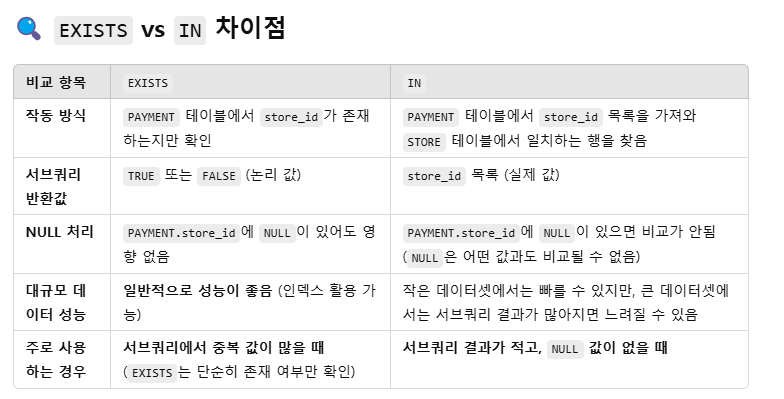

In [ ]:
#실습 6

# 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

# 1. 직급이 '사원'인 직원의 급여를 조회하는 쿼리를 작성해봅시다.
select salary from EMPLOYEE
where position = '사원'
order by salary asc;
#다중행 - 다중행 연산자 (in,all, any)

# 2. 앞에서 작성한 쿼리와 ALL을 이용하여, 모든 사원들의 급여보다 높거나 같은 급여를 가진 직원을 조회하는 쿼리를 작성해봅시다.
select employee_id, salary, position
from EMPLOYEE
where salary >= ALL(
    select salary from EMPLOYEE
    where position = '사원'
)
order by employee_id asc;

In [ ]:
#실습 7

# 아래는 FOOD 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC FOOD;

# 음식타입이 Main인 임의의 음식의 가격보다 비싼 음식들을 조회해봅시다.
#음식 타입이 메인인 음식 가격 조회 -> 서브쿼리
#임의의 음식 가격보다 비싸면 됨 -> 메인쿼리 조건 -> 그 어떤 가격보다 비싸다 = any()
SELECT food_id, food_type, food_name, price
from FOOD
WHERE price > ANY(
    SELECT price
    FROM FOOD
    WHERE food_type='Main')
order by food_id asc;

In [ ]:
#실습8

#아래는 BOOK, BOOK_STOCK 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC BOOK;
DESC BOOK_STOCK;

#BOOK_STOCK 테이블에서 재고가 1 이상인 데이터 -> 서브쿼리
#의 책 제목, 책 작가 정보를 조회한 후, -> 다중컬럼 서브쿼리
# BOOK 테이블에 IN (다중행?-확인해보자)을 활용하여 조회하는 쿼리를 작성해봅시다.
SELECT book_id, book_name, book_writer, price
from BOOK
where (book_name, book_writer) IN
    (
    SELECT book_name, book_writer #다중행/다중컬럼
    FROM BOOK_STOCK
    WHERE stock > 0
    )
order by book_id asc;

In [ ]:
#퀴즈4 - any in,exists는 비교연산자가 아님

In [ ]:
#실습 9
# 아래는 LECTURE, LECTURE_TYPE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC LECTURE; #강의 ID, 강의 이름, 강의 타입 ID -> 모든 강의에 대한 정보
DESC LECTURE_TYPE;#타입 ID, 타입 이름 -> 강의 타입별 정보

# 타입ID, 타입이름, 타입에 해당하는 강의의 수를 조회하는 쿼리를 작성해봅시다.
SELECT type_id, type_name,
#select 에 있는 서브쿼리 -> 조회될때 같이 하나씩 수행
#메인쿼리에서의 from절에 LECTURE_TYPE 테이블에서
#두 컬럼에 대한 데이터 행 하나씩 조회할때 서브쿼리 수행
    (SELECT COUNT(*)
    FROM LECTURE l
    where t.type_id=l.lecture_type_id )
    #강의id를 통해서 두 테이블에서 같은 강의에 대한 정보만
    #가지고 와서 cnt
FROM LECTURE_TYPE t
order by type_id asc;

In [ ]:
#퀴즈5 - from(다중 행,열 형태여야)

In [ ]:
#실습 10
-- 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

-- 1. 부서이름이 '개발'인 직원의 직원ID, 급여 정보를 가지는 뷰(EMPLOYEE_DEV)를 만드는 쿼리를 작성해봅시다.
CREATE VIEW EMPLOYEE_DEV AS (
  SELECT employee_id, salary
  FROM EMPLOYEE
  WHERE department_name = '개발'
);

-- 2. 위에서 만든 뷰(EMPLOYEE_DEV)의 모든 데이터를 조회하는 쿼리를 작성해봅시다.
SELECT * FROM EMPLOYEE_DEV;

In [ ]:
#퀴즈6 - 4
#퀴즈7 - replace

In [ ]:
#미션1

# -- 아래는 STORE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC STORE;

# -- 1. 남부 지역 가게들의 매출액을 조회하는 쿼리를 작성해봅시다.
SELECT sales_amount
FROM STORE
WHERE store_location = '남부'
ORDER BY sales_amount asc;


# -- 2. 남부 지역의 모든 가게보다 매출이 높은 가게를 조회하는 쿼리를 작성해봅시다.
SELECT store_id, store_name, store_location, sales_amount
FROM STORE
WHERE sales_amount > ALL(
    SELECT sales_amount
    FROM STORE
    WHERE store_location = '남부')
ORDER BY store_id asc;

In [ ]:
#미션2

# -- 아래는 ELICE_MART 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC ELICE_MART;
DESC PRODUCT;

# -- 1. ELICE_MART 에서 재고가 0인 상품에 대해 조회하는 쿼리를 작성하세요.
SELECT product_id, product_name
FROM ELICE_MART
WHERE stock = 0
ORDER BY product_id asc;

# -- 2. ELICE_MART 에서는 재고가 0이고, PRODUCT 에서는 재고가 0 초과인 상품에 대해 조회하는 쿼리를 작성하세요.
SELECT product_id, product_name
FROM ELICE_MART
WHERE stock = 0
AND (product_id, product_name) IN (
    SELECT product_id, product_name
    FROM PRODUCT
    WHERE stock > 0)
ORDER BY product_id asc;


In [ ]:
#미션3 ##############

# 아래는 EMPLOYEE, DEPARTMENT 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;
DESC DEPARTMENT;

# EMPLOYEE_DEPARTMENT 뷰를 만들고, 뷰의 모든 데이터를 조회하세요.
CREATE VIEW EMPLOYEE_DEPARTMENT AS
(
  SELECT
    employee_id,
    employee_name,
    salary,
    E.department_id,
    department_name
  FROM
    EMPLOYEE E
  INNER JOIN
    DEPARTMENT D
  ON
    E.department_id = D.department_id
);

SELECT * FROM EMPLOYEE_DEPARTMENT;